In [7]:
import cv2
from PIL import Image
import numpy as np
import os
import matplotlib.pyplot as plt

In [8]:
def mse(imageA, imageB):
	err = np.sum((np.asarray(imageA) - np.asarray(imageB)) ** 2)
	err /= float(imageA.size[0] * imageA.size[1])
	
	return err


In [9]:
def diff_roi(img, coordinates):

    img = img.crop(coordinates) # base image

    directory = 'frames'

    files = np.array([])
    errors = np.array([])

    for filename in os.listdir(directory):
        f = os.path.join(directory, filename)
        
        curr_image = Image.open(f)
        imgcurr_crop = curr_image.crop(coordinates)

        err = mse(img, imgcurr_crop)

        # print(f"file {f}, err {err}")

        files = np.append(files, f)
        errors = np.append(errors, err)
    
    return files, errors


## ROI 1

In [10]:
# coordinates
roi1_coord = (502, 344, 502+61, 344+86)

# base image for comparison
image1 = Image.open('frames/frame_6000.jpg')# show base iamge
image1.crop(roi1_coord).show()

In [11]:
# get mse
roi1_f, roi1_e = diff_roi(image1, roi1_coord)

In [143]:
# image viewer for roi 1
Image.open('frames/frame_10210.jpg').crop(roi1_coord).show()

In [144]:
# filter mse
for i in range(len(roi1_f)):
    if 157 > roi1_e[i] > 156.5:
        print(roi1_f[i].split('/')[-1], roi1_e[i])

frame_10210.jpg 156.81261913839114
frame_10173.jpg 156.76725123903927
frame_4215.jpg 156.8776210446054
frame_10209.jpg 156.54708349218453
frame_4221.jpg 156.66717499046894
frame_4291.jpg 156.68299656881433
frame_4293.jpg 156.6639344262295


(array([  18., 6492.,  542.,  329.,  588.,  712.,  551.,   96., 2735.,
        1438.]),
 array([  0.        ,  23.52310332,  47.04620663,  70.56930995,
         94.09241327, 117.61551658, 141.1386199 , 164.66172322,
        188.18482653, 211.70792985, 235.23103317]),
 <BarContainer object of 10 artists>)

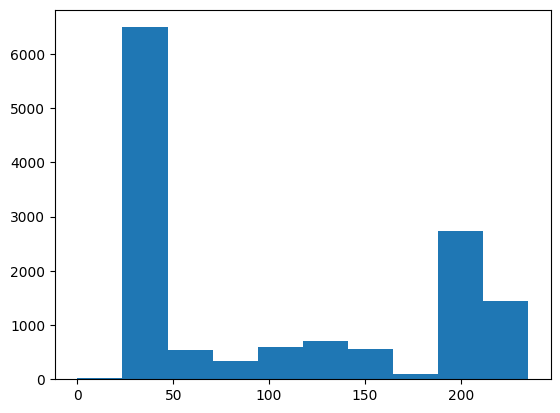

In [12]:
# distribution of mse for roi 1
plt.hist(roi1_e)

In [13]:
# chosen threshold
threshold_1 = 156.5

# find number of frames
print(len(roi1_e))
c1 = 0
for err in roi1_e:
    if err > threshold_1:
        c1 += 1

print(f"ROI 1 count: {c1}")

13501
ROI 1 count: 4320


## ROI 5

In [14]:
# coordinates
roi5_coord = (545, 577, 545+81, 577+75)

# base image for comparison
image5 = Image.open('frames/frame_6000.jpg')# show base iamge
image5.crop(roi5_coord).show()

In [ ]:
# get mse
roi5_f, roi5_e = diff_roi(image5, roi5_coord)

In [19]:
# image viewer for roi 1
Image.open('frames/frame_13000.jpg').crop(roi5_coord).show()